# **MLPP23 // Assignment #5**

assigned : **Apr 5, 2023**

DUE : **Apr 10, 2023 11:59pm**

## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

This notebook will use Logistic Regression to attempt to predict diabetes from recorded health data in the Pima population in AZ.  The data is available [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity) and a description of a long term diabetes study involving this population can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/).  *Answering the questions below will require that you read through the content of these links in detail.*


<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

---

### **Part 1: Loading and Parsing the Data**

**Load the study data from the `mlpp23/data/diabetes/` folder.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/mlpp23/data/diabetes/diabetes.csv"
df=pd.read_csv(path)

**Display the contents of this data and describe <u>in your own words</u> what the content of each column is, including units where appropriate.**

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The dataset contains information on 768 women of Pima Indian heritage in AZ, who were at least 21 years old. The data was collected by the US National Institute of Diabetes and Digestive and Kidney Diseases. Longitudinal investigations, starting in 1965, have involved study participants living on the Gila River Reservation outside Phoenix, Arizona. Several constraints were placed on the selection of these instances from a larger database.
The datasets consists of several medical predictor variables
1. Pregnancies: Number of times the woman was pregnant
2. Glucose: Measure of plasma glucose concentration at 2 hours in an oral glucose tolerance test (mg/dL).
3. BloodPressure: Measure of the diastolic blood pressure (mm Hg)
4. SkinThickness: Measure of skin thickness. The triceps skin fold thickness is a measure of the thickness of a fold of skin and subcutaneous fat tissue on the back of the upper arm, specifically over the triceps muscle. (mm)
5. Insulin: 2-hour serum insulin. The 2-hour serum insulin is a measure of the concentration of insulin in the blood, specifically 2 hours after a glucose challenge.  (mU/ml)
6. BMI: Body mass index (BMI) is a measure of body fat based on an individual's weight in kilograms (kg) divided by their height in meters (m) squared.(kg/m^2)
7. DiabetesPedigreeFunction: The Diabetes Pedigree Function is a measure of the genetic predisposition to diabetes in an individual's family. It is a numerical score that reflects the degree of diabetes prevalence among an individual's relatives, with higher scores indicating a stronger family history of the disease.
8. Age: Measure of the age in years
9. Outcome : It is the target variable. It is a binary variable indicating whether or not the patient developed diabetes within 5 years of the data collection. The positive class indicates presence of diabetes, while the negative class or 0 indicates the absence of diabetes.
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

**Make a 3x3 panel plot with the histograms of each of the nine columns.**

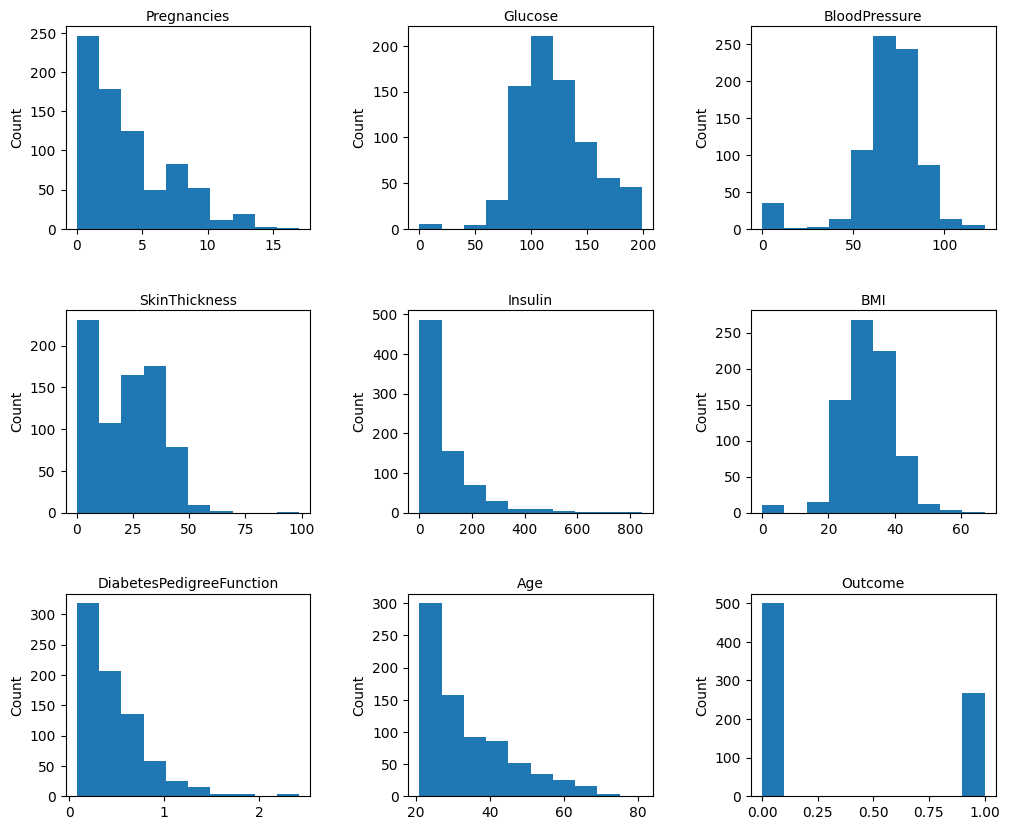

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        axs[i].hist(df[col])
        axs[i].set_xlabel(col)
        axs[i].xaxis.set_label_position('top')
        axs[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

**Describe what information you can infer from each histogram in this plot.**

1. The histogram of the pregnancy shows the distribution of pregnanices in the study sample. The histogram is right skewed. It has values values ranging from 0-17 and most of the women having 1 pregnancy.
2.The histogram of Glucose shows the distribution of glucose levels among the women. It indicates that few women have 0 mg/dL glucose levels which is physically not possible. Most of the women have Glucose levels of 99-100 mg/dL.
3.The histogram of blood pressure shows the distribution of blood pressure in our study sample. It indicates that few women have 0 mm Hg blood pressure which is physically not possible. Most of the women have blood pressure of 70 mm Hg.
4. The histogram of Skin thickness shows the distribution of the skin thickness in our study sample. Majority of the women have zero skin thickness which is physically not possible. An outlier also seems to be present.
5. The histogram of Insulin shows the distribution of the insulin levels in our study sample. Majority of the women have zero insulin levels which is physically not possible. The histogram is right skewed.
6. The histogram of BMI shows the distribution of the BMI in our study sample. Few women have zero BMI  which is physically not possible. The histogram is symetrically distributed and most of the women have a BMI of 32 kg/m2.
7. The histogram of Diabetes Pedigree Function shows the distribution of the Diabetes Pedigree in our study sample.  The histogram is right skewed.
8. The histogram of age shows the distribution of the age  in our study sample.  The histogram is right skewed with minimum age being 21 and maximum age being 81.
9. The histogram of Outcome shows the distribution of the outcome(Presence/absence of diabetes)  in our study sample.  Majority of the women do not have diabetes.

**Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum() #no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_new=df[df["Glucose"]>0].reset_index(drop=True) #dropping rows with Glucose levels=0
df_new=df_new[df_new["BloodPressure"]>0].reset_index(drop=True) #dropping rows with BloodPressure=0
df_new=df_new[df_new["SkinThickness"]>0].reset_index(drop=True)#dropping rows with SkinThickness=0
df_new=df_new[df_new["Insulin"]>0].reset_index(drop=True)#dropping rows with Insulin=0
df_new=df_new[df_new["BMI"]>0].reset_index(drop=True)#dropping rows with BMI=0

In [ ]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [ ]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

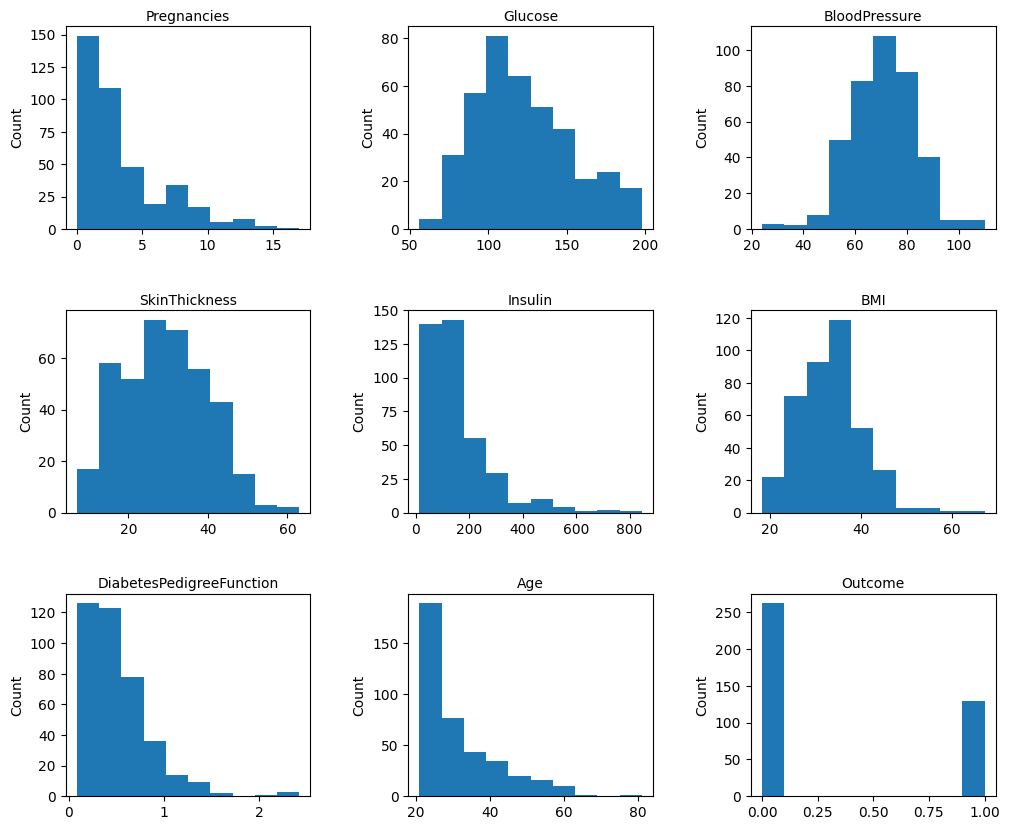

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()
for i, col in enumerate(df_new.columns):
    if df_new[col].dtype == 'float64' or df[col].dtype == 'int64':
        axs[i].hist(df_new[col])
        axs[i].set_xlabel(col)
        axs[i].xaxis.set_label_position('top')
        axs[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

**Create features and targets objects from the subset of the data that you created above where the features are only blood pressure and the target is the outcome.**

In [ ]:
feat = pd.DataFrame()
feat["BloodPressure"]=df_new["BloodPressure"]
targ=df_new["Outcome"]

**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr = LogisticRegression()
logr.fit(feat, targ)

LogisticRegression()

In [ ]:
pred = logr.predict(feat)
df_new["pred"]=pred

In [ ]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred
0,1,89,66,23,94,28.1,0.167,21,0,0
1,0,137,40,35,168,43.1,2.288,33,1,0
2,3,78,50,32,88,31.0,0.248,26,1,0
3,2,197,70,45,543,30.5,0.158,53,1,0
4,1,189,60,23,846,30.1,0.398,59,1,0


<b>

Make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Outcome')

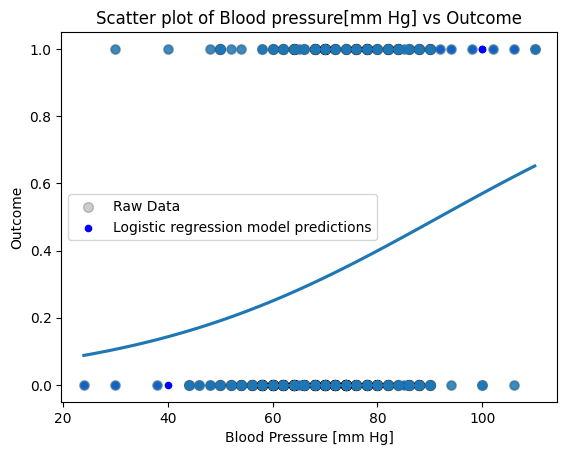

In [ ]:
ax = df_new.plot("BloodPressure", "Outcome", kind="scatter", alpha=0.2,
                color="black", label="Raw Data", s=50, title="Scatter plot of Blood pressure[mm Hg] vs Outcome")
ax = df_new.plot("BloodPressure", "pred", label="Logistic regression model predictions", color="blue", ax=ax,kind="scatter",s=20)
#plt.plot(logr)
#plt.plot(df_new["BloodPressure"], df_new["Outcome"], label="Logistic ", color="red", linewidth=3)
sns.regplot(x="BloodPressure",y= "Outcome", data=df_new, logistic=True, ci=None, label="Best")
ax.set_xlabel("Blood Pressure [mm Hg]")
ax.set_ylabel("Outcome")

**Discuss what you can infer from this plot.**

In the plot, the black transparent dots represent the raw data and the blue dots are the logistic regression model predictions. In most of the places we see the blue dots overlapping the bigger transparent black dots resulting in a lighter blue color. These are the points where the model has predicted the outcome that is present in the raw data i.e target values (outcomes) which are correctly predicted. At few places the target values are not predicted correctly. The logistic function is also plotted.

**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [ ]:
acc= (pred==targ).sum()/len(targ)

In [ ]:
print("accuracy is {0:2f}".format(acc))

accuracy is 0.676020


Now let's fit a model that uses all features.

**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

In [ ]:
feat_1=pd.DataFrame()
feat_1=df_new.iloc[:,0:-2]

In [ ]:
feat_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [ ]:
targ_1=df_new["Outcome"]

In [ ]:
logr_1 = LogisticRegression()
logr_1.fit(feat_1, targ_1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_1 = logr_1.predict(feat_1)
df_new["pred_1"]=pred_1

**Calculate the accuracy for this model.**

In [ ]:
acc_1= (pred_1==targ_1).sum()/len(targ_1)

In [ ]:
print("accuracy is {0:2f}".format(acc_1))

accuracy is 0.788265


**If someone were to ask you if either of the two models that you just fit are "good" models, what would you say? (250 words max)**

The two models can definitely be refined to make them perform better. Firstly, the accuracy of the second model (0.788) is more than that of the first model (0.676) as the former takes into consideration all the variables which can account for the outcome whereas the first model takes into consideration only one variable (blood pressure). In both the cases the variables have not been standardized. Standardizing will ensure that all the variables are on the same scale and hence the model will be better. We have dropped the rows for which the values of any of the columns are not physically possible. Dropping the rows means loss of data and loss of few important data points. The physically impossible values can be imputed which will prevent the loss of data. Outliers can further be removed. Hence the two models can be made much better by standardizing the data, imputing the physically impossible values and not dropping them, removal of outliers and taking all the relevant features into consideration.  Accuracy is just one metric for measuring the performance of a model. Many other metrics can also be calculated to measure the performance of the models.